# PMI india Dataset

-----------------------------------------------------------------------------------------------------------------------------------------------

#### [Kaggle Dataset - Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

- This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within five years. It
is a binary classification problem.

In [48]:
# a) Load libraries
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import plotly.express as pltly
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [49]:
# b) Load dataset
df =  pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Summarize Data

In [50]:
# a) Descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [52]:
df.shape

(768, 9)

In [53]:
# b) Data visualizations
pltly.imshow(df.corr().round(3), text_auto=True, width=800, height=800, )

In [54]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

- The skew result show a positive (right) or negative (left) skew. Values closer to zero show
less skew.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

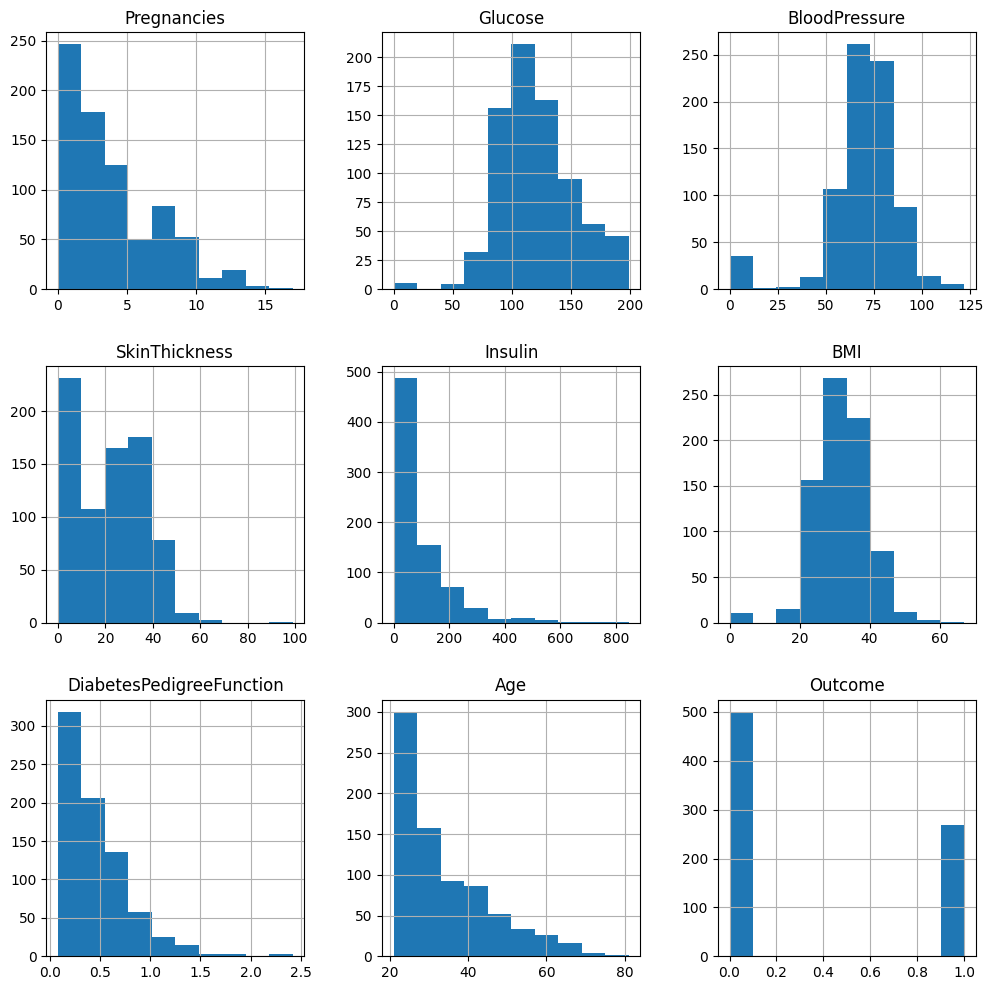

In [55]:
df.hist(figsize=(12,12))

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

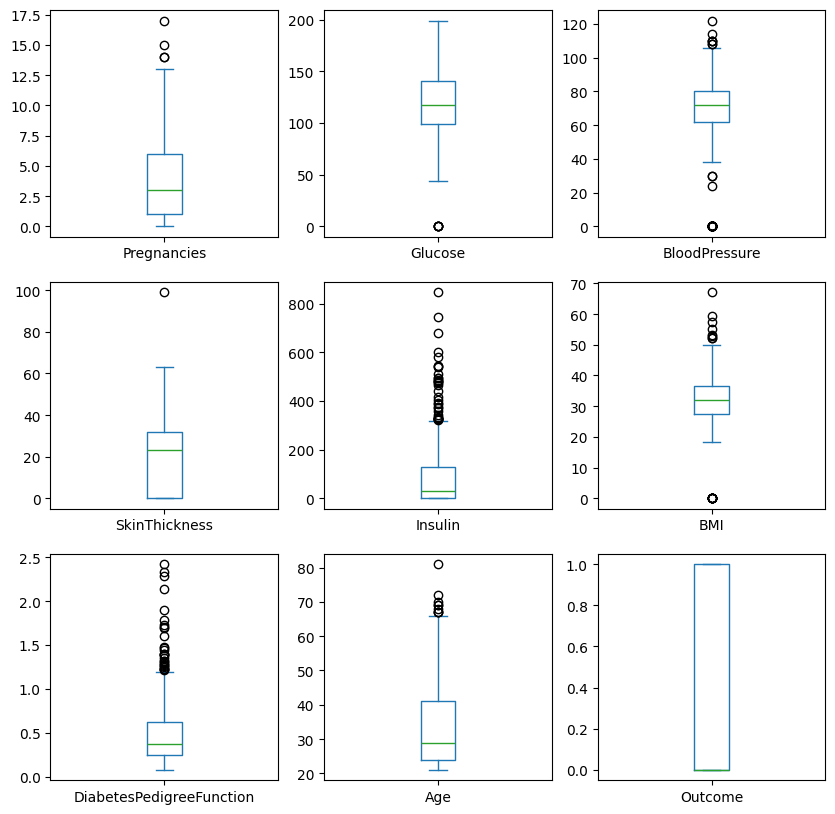

In [56]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10), sharex=False)

### Prepare Data

In [57]:
# a) Data Cleaning
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
# b) Feature Selection
new_df = df.copy()
Y = new_df[['Outcome']]
X = new_df.drop(['Outcome'], axis=1)
print(X.shape, Y.shape)
Y = Y.squeeze()

(768, 8) (768, 1)


In [59]:
# Feature importance
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_, model.feature_names_in_)

[0.10735801 0.23240428 0.09974897 0.08135572 0.07450949 0.14292661
 0.11987183 0.14182509] ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [60]:
imp = model.feature_importances_
feat = model.feature_names_in_
feature_dict = {}
for i in range(len(imp)):
    feature_dict[feat[i]] = imp[i]
feature_dict

{'Pregnancies': 0.10735801164295487,
 'Glucose': 0.23240428351809594,
 'BloodPressure': 0.09974896838113106,
 'SkinThickness': 0.08135572469384911,
 'Insulin': 0.07450948817278098,
 'BMI': 0.14292660966637288,
 'DiabetesPedigreeFunction': 0.1198718282670244,
 'Age': 0.1418250856577907}

In [61]:
# We select Glucose , DiabetesPedigreeFunction, Age, BMI, Bloodpressure
X=X[['Glucose' , 'DiabetesPedigreeFunction', 'Age', 'BMI', 'BloodPressure']]

### Evaluate Algorithms

In [62]:
# a) Split-out validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state=42)

In [63]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [64]:
# b) Test options and evaluation metric
kfold = KFold(n_splits=10)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()* 100, results.std()*100

(77.34107997265892, 4.6741515898285835)

In [65]:
# d) Compare Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    for i in range(len(cv_results)):
        names.append(name)
        results.append(cv_results[i])
    print(f'{name}, {cv_results.mean()*100}, {cv_results.std()*100}')

model_df = pd.DataFrame({'model': names, 'performance': results})
fig = pltly.box(model_df, x="model", y="performance")
fig.show()

LR, 74.58333333333333, 10.25372561018135
LDA, 74.58333333333333, 10.25372561018135
KNN, 72.0, 12.777204093401828
CART, 68.66666666666667, 8.611603928550258
NB, 73.29166666666667, 10.891590155303822
SVM, 74.62500000000001, 11.17016425324375


- From the above graph we can see that Logistic Regression & Linear Discriminant Analysis have good accuracy so we can take further these 2 models for this particular problem.

### Train & Test models

In [67]:
def train_test_models(name, model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    data = pd.DataFrame({'pred': pred, 'y_test': y_test})
    count_pred = (data['pred'] == data['y_test']).sum()
    total = pred.shape
    print(f'Model:- {name} Accuracy:- {round((count_pred/total[0])*100,5)}')
    confusion_matrix = metrics.confusion_matrix(data['pred'], data['y_test'])
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    

Model:- LogisticRegression (LR) Accuracy:- 74.30894


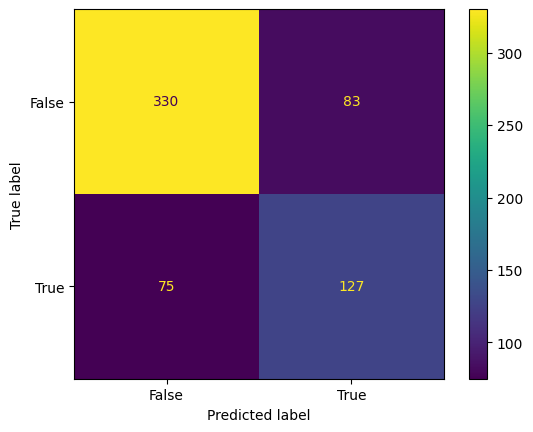

In [68]:
train_test_models('LogisticRegression (LR)', LogisticRegression())


Model:- LinearDiscriminantAnalysis (LDA) Accuracy:- 75.93496


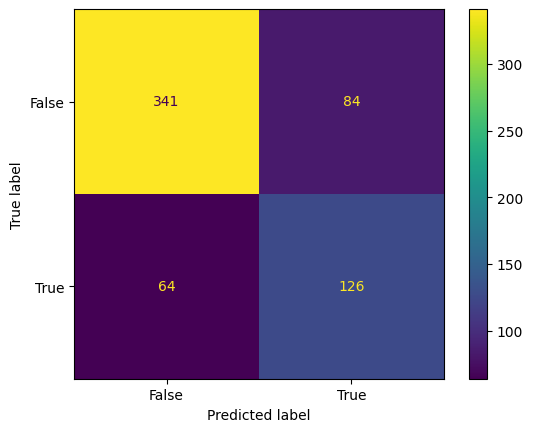

In [69]:
train_test_models('LinearDiscriminantAnalysis (LDA)', LinearDiscriminantAnalysis())